In [1]:
import os
import sys
import logging

sys.path.append("..")

# Set logging level to warning
logging.basicConfig(level=logging.WARNING)

In [2]:
import protac_degradation_predictor as pdp

import pandas as pd
from tqdm.notebook import tqdm

/opt/conda/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
data_dir = "data"
protac_df = pd.read_csv(os.path.join(data_dir, "PROTAC-Degradation-DB.csv"))

pDC50_threshold = 6.0
Dmax_threshold = 0.6

# Map E3 Ligase Iap to IAP
protac_df['E3 Ligase'] = protac_df['E3 Ligase'].str.replace('Iap', 'IAP')
protac_df['Active'] = protac_df.apply(
    lambda x: pdp.is_active(x['DC50 (nM)'], x['Dmax (%)'], pDC50_threshold=pDC50_threshold, Dmax_threshold=Dmax_threshold), axis=1
)
protac_df[['Uniprot', 'Cell Line Identifier', 'Smiles', 'E3 Ligase', 'DC50 (nM)', 'Dmax (%)', 'Active']]

,Uniprot,Cell Line Identifier,Smiles,E3 Ligase,DC50 (nM),Dmax (%),Active
0,Q07817,MOLT-4,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,NaN,NaN,NaN
1,Q07817,MOLT-4,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,NaN,NaN,NaN
2,Q07817,MOLT-4,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,NaN,NaN,NaN
3,Q07817,MOLT-4,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,NaN,NaN,NaN
4,Q07817,MOLT-4,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,53.0,100.0,True
...,...,...,...,...,...,...,...
2136,O60885,HEK293,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,VHL,63.1,NaN,NaN
2137,Q05397,A549 Cas9,CNC(=O)c1ccccc1Nc1cc(Nc2ccc(N3CCN(CCOCCOCCOCCO...,VHL,125.9,NaN,NaN
2138,Q05397,A549 Cas9,CNC(=O)c1ccccc1Nc1cc(Nc2ccc(N3CCN(CCOCCOCC(=O)...,VHL,158.5,NaN,NaN
2139,Q05397,A549 Cas9,CNC(=O)c1ccccc1Nc1cc(Nc2ccc(N3CCN(CCOCC(=O)N[C...,VHL,31.6,NaN,NaN


In [4]:
nan_df = protac_df[protac_df['Active'].isna()]
nan_df[['Uniprot', 'Cell Line Identifier', 'Smiles', 'E3 Ligase', 'DC50 (nM)', 'Dmax (%)', 'Active']]

,Uniprot,Cell Line Identifier,Smiles,E3 Ligase,DC50 (nM),Dmax (%),Active
0,Q07817,MOLT-4,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,NaN,NaN,NaN
1,Q07817,MOLT-4,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,NaN,NaN,NaN
2,Q07817,MOLT-4,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,NaN,NaN,NaN
3,Q07817,MOLT-4,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,NaN,NaN,NaN
5,Q07817,MOLT-4,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2136,O60885,HEK293,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,VHL,63.1,NaN,NaN
2137,Q05397,A549 Cas9,CNC(=O)c1ccccc1Nc1cc(Nc2ccc(N3CCN(CCOCCOCCOCCO...,VHL,125.9,NaN,NaN
2138,Q05397,A549 Cas9,CNC(=O)c1ccccc1Nc1cc(Nc2ccc(N3CCN(CCOCCOCC(=O)...,VHL,158.5,NaN,NaN
2139,Q05397,A549 Cas9,CNC(=O)c1ccccc1Nc1cc(Nc2ccc(N3CCN(CCOCC(=O)N[C...,VHL,31.6,NaN,NaN


In [5]:
from collections import defaultdict

predicted_df = []
# Iterate over batched rows in the PROTAC dataframe (use tqdm for progress bar)
batch = defaultdict(list)
batch_size = 10
for index, row in tqdm(nan_df.iterrows(), total=nan_df.shape[0]):
    if len(batch) < batch_size:
        batch['protac_smiles'].append(row['Smiles'])
        batch['e3_ligase'].append(row['E3 Ligase'])
        batch['target_uniprot'].append(row['Uniprot'])
        batch['cell_line'].append(row['Cell Line Identifier'])
    else:
        active_protac_prob = pdp.get_protac_active_proba(
            batch['protac_smiles'],
            batch['e3_ligase'],
            batch['target_uniprot'],
            batch['cell_line'],
            device='cpu', # Default to 'cpu'
        )
        for i in range(len(batch['protac_smiles'])):
            mean_active_protac_prob = active_protac_prob['mean'][i]
            majority_vote_protac_prob = active_protac_prob['majority_vote'][i]
            row['mean_active_prob'] = mean_active_protac_prob
            row['majority_vote_active'] = majority_vote_protac_prob
            predicted_df.append(row.copy())
        batch = defaultdict(list)


for index, row in tqdm(nan_df.iterrows(), total=nan_df.shape[0]):
    protac_smiles = row['Smiles']
    e3_ligase = row['E3 Ligase']
    target_uniprot = row['Uniprot']
    cell_line = row['Cell Line Identifier']

    try:
        active_protac_prob = pdp.get_protac_active_proba(
            protac_smiles,
            e3_ligase,
            target_uniprot,
            cell_line,
            device='cpu', # Default to 'cpu'
        )
        mean_active_protac_prob = active_protac_prob['mean']
        majority_vote_protac_prob = active_protac_prob['majority_vote']
    except Exception as e:
        logging.error(f"Error: {e}")
        mean_active_protac_prob = float('nan')
        majority_vote_protac_prob = float('nan')
    
    row['mean_active_prob'] = mean_active_protac_prob
    row['majority_vote_active'] = majority_vote_protac_prob
    predicted_df.append(row.copy())

predicted_df = pd.DataFrame(predicted_df)
predicted_df[['Uniprot', 'Cell Line Identifier', 'Smiles', 'E3 Ligase', 'mean_active_prob', 'majority_vote_active']]

  0%|          | 0/1284 [00:00<?, ?it/s]

,Uniprot,Cell Line Identifier,Smiles,E3 Ligase,mean_active_prob,majority_vote_active
0,Q07817,MOLT-4,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,0.661548,True
1,Q07817,MOLT-4,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,0.664419,True
2,Q07817,MOLT-4,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,0.671933,True
3,Q07817,MOLT-4,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,0.662499,True
5,Q07817,MOLT-4,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,0.649880,True
...,...,...,...,...,...,...
2136,O60885,HEK293,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,VHL,0.596114,True
2137,Q05397,A549 Cas9,CNC(=O)c1ccccc1Nc1cc(Nc2ccc(N3CCN(CCOCCOCCOCCO...,VHL,0.652442,True
2138,Q05397,A549 Cas9,CNC(=O)c1ccccc1Nc1cc(Nc2ccc(N3CCN(CCOCCOCC(=O)...,VHL,0.645811,True
2139,Q05397,A549 Cas9,CNC(=O)c1ccccc1Nc1cc(Nc2ccc(N3CCN(CCOCC(=O)N[C...,VHL,0.667549,True


In [6]:
# Get mean active probability and majority vote active statistics
mean_active_prob_stats = predicted_df['mean_active_prob'].describe()
majority_vote_active_stats = predicted_df['majority_vote_active'].describe()

display(mean_active_prob_stats)
display(majority_vote_active_stats)

count    1284.000000
mean        0.456657
std         0.163657
min         0.034244
25%         0.348055
50%         0.493245
75%         0.577750
max         0.930988
Name: mean_active_prob, dtype: float64

count      1284
unique        2
top       False
freq        665
Name: majority_vote_active, dtype: object

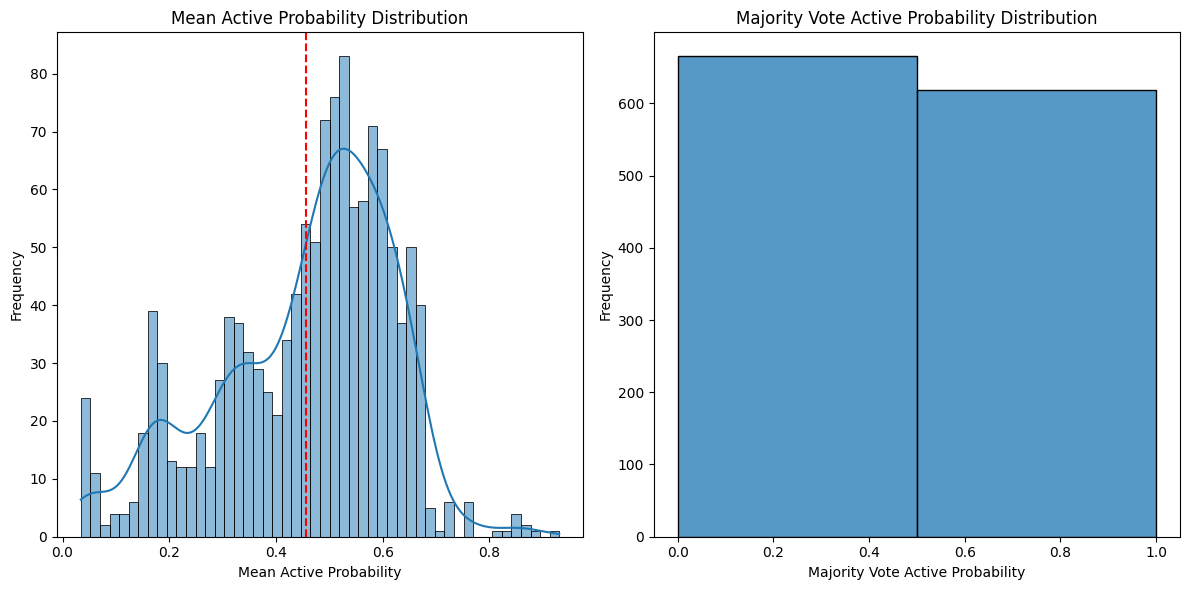

In [11]:
# Plot the distribution of mean active probability and majority vote active probability
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(predicted_df['mean_active_prob'], bins=50, ax=ax[0], kde=True)
ax[0].set_title("Mean Active Probability Distribution")
ax[0].set_xlabel("Mean Active Probability")
ax[0].set_ylabel("Frequency")
# Plot the mean of the mean active probability as a vertical line
ax[0].axvline(predicted_df['mean_active_prob'].mean(), color='r', linestyle='--', label=f"Mean: {predicted_df['mean_active_prob'].mean():.2f}")

sns.histplot(predicted_df['majority_vote_active'], bins=2, ax=ax[1])
ax[1].set_title("Majority Vote Active Probability Distribution")
ax[1].set_xlabel("Majority Vote Active Probability")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

,Dmax (%),pDC50,Uniprot,Cell Line Identifier,Smiles,E3 Ligase,mean_active_prob,majority_vote_active
143,NaN,6.000000,Q9UHD2,NaN,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,VHL,0.881667,True
144,NaN,6.000000,Q9UHD2,NaN,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,VHL,0.862472,True
145,NaN,6.000000,Q9UHD2,NaN,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,VHL,0.854805,True
146,NaN,6.000000,Q9UHD2,NaN,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,VHL,0.853683,True
147,NaN,6.000000,Q9UHD2,NaN,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,VHL,0.844864,True
...,...,...,...,...,...,...,...,...
1865,61.0,NaN,Q13547,HCT116-53BPI(+/-),Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,VHL,0.153555,False
2019,NaN,6.920819,P40763,MOLM-16,NC(=O)CC[C@H](NC(=O)[C@@H]1CC[C@@H]2CCN(C(=O)C...,CRBN,0.140929,False
2020,NaN,7.769551,P40763,SU-DHL-1,NC(=O)CC[C@H](NC(=O)[C@@H]1CC[C@@H]2CCN(C(=O)C...,CRBN,0.135795,False
2096,NaN,6.153663,Q9BY41,Jurkat,O=C1CCC(N2C(=O)c3cccc(NCCCCCCCCCCCNC(=O)c4cccc...,CRBN,0.162395,False


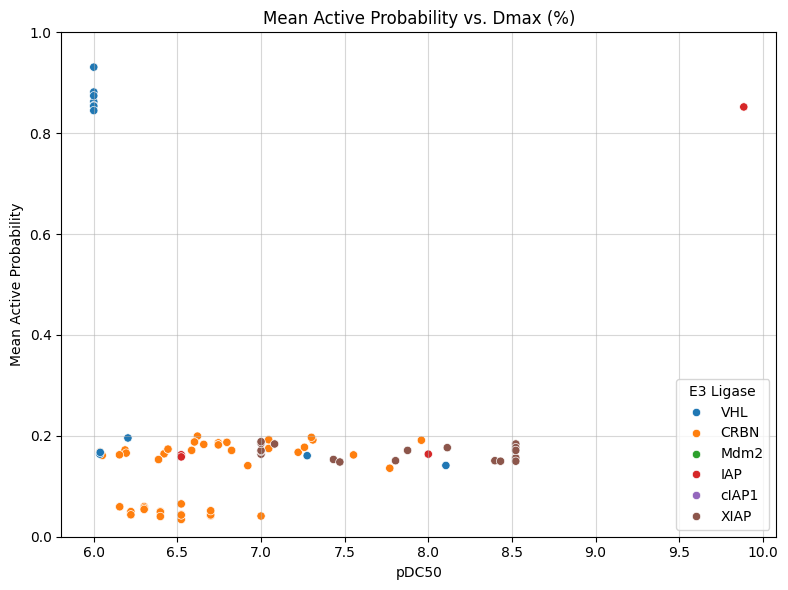

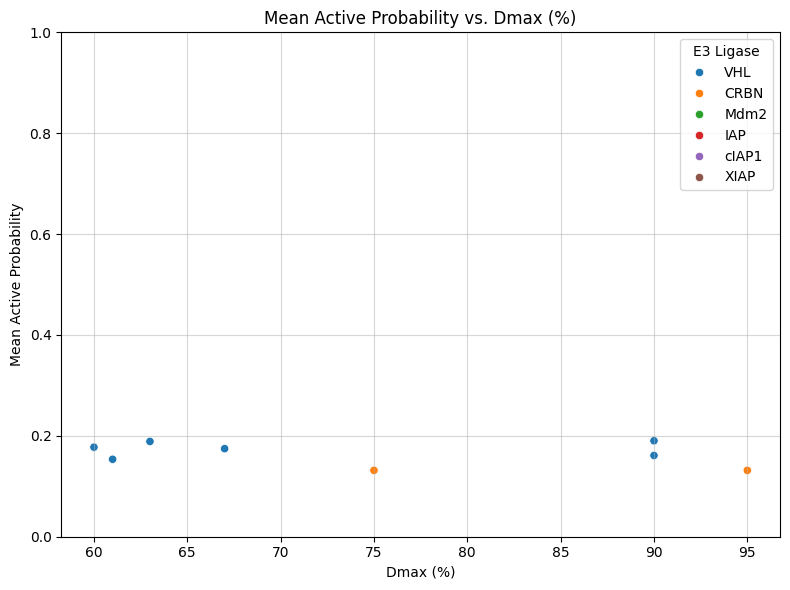

In [34]:
import numpy as np

confidence_threshold = 0.8

tmp = predicted_df[(predicted_df['mean_active_prob'] > confidence_threshold) | (predicted_df['mean_active_prob'] < (1-confidence_threshold))].copy()
tmp['pDC50'] = tmp['DC50 (nM)'].apply(lambda x: -np.log10(x*1e-9) if x > 0 else float('nan'))
display(tmp[['Dmax (%)', 'pDC50', 'Uniprot', 'Cell Line Identifier', 'Smiles', 'E3 Ligase', 'mean_active_prob', 'majority_vote_active']])

# Plot a scatter plot of mean active probability vs. Dmax (%)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.scatterplot(data=tmp, x='pDC50', y='mean_active_prob', hue='E3 Ligase', ax=ax)
ax.set_title("Mean Active Probability vs. Dmax (%)")
ax.set_xlabel("pDC50")
ax.set_ylabel("Mean Active Probability")

ax.grid(axis='both', linestyle='-', alpha=0.5)

plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Plot a scatter plot of mean active probability vs. Dmax (%)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.scatterplot(data=tmp, x='Dmax (%)', y='mean_active_prob', hue='E3 Ligase', ax=ax)
ax.set_title("Mean Active Probability vs. Dmax (%)")
ax.set_xlabel("Dmax (%)")
ax.set_ylabel("Mean Active Probability")

ax.grid(axis='both', linestyle='-', alpha=0.5)

plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [23]:
e3_ligases = list(pdp.config.config.e3_ligase2uniprot.keys())
for e3_ligase in e3_ligases:
    active_protac = pdp.is_protac_active(
        protac_smiles,
        e3_ligase,
        target_uniprot,
        cell_line,
        device='cpu', # Default to 'cpu'
        proba_threshold=0.5, # Default value
    )
    active_protac_prob = pdp.get_protac_active_proba(
        protac_smiles,
        e3_ligase,
        target_uniprot,
        cell_line,
        device='cpu', # Default to 'cpu'
    )
    print(f'[{e3_ligase}]\tThe PROTAC is {"active" if active_protac else "inactive"} with probability {active_protac_prob}')

[VHL]	The PROTAC is active with probability {'mean': 0.5639503, 'majority_vote': True}
[CRBN]	The PROTAC is active with probability {'mean': 0.55152416, 'majority_vote': True}
[DCAF11]	The PROTAC is inactive with probability {'mean': 0.34527245, 'majority_vote': False}
[DCAF15]	The PROTAC is inactive with probability {'mean': 0.39864042, 'majority_vote': False}
[DCAF16]	The PROTAC is inactive with probability {'mean': 0.38463345, 'majority_vote': False}
[MDM2]	The PROTAC is inactive with probability {'mean': 0.3296026, 'majority_vote': False}
[Mdm2]	The PROTAC is inactive with probability {'mean': 0.3296026, 'majority_vote': False}
[XIAP]	The PROTAC is inactive with probability {'mean': 0.3460035, 'majority_vote': False}
[cIAP1]	The PROTAC is inactive with probability {'mean': 0.28262994, 'majority_vote': False}
[IAP]	The PROTAC is inactive with probability {'mean': 0.3460035, 'majority_vote': False}
[Iap]	The PROTAC is inactive with probability {'mean': 0.3460035, 'majority_vote': Fal